# Description of this work package

Let us assume that you are the operator of a factory, where bearings are critical components in your machine. The failure of bearings is catastrophic for the machine so the failure cost of the bearing is estimated to be $C_1 = 100 000$ euros. The price of a bearing is $1000$ euros. From the vendor, you obtained a result of life testing of the bearings conducted by the vendor (see the attached excel file). The unit of the lifetime is already transformed into days. Please note that the testing is censored after 600 days. You goal is to decide a best maintenance strategy for the bearings. You are considering three options:
- Implement a corrective maintenance strategy: Replace the bearing only when the bearing fails.
- Purchase a online condition-monitoring system from Siemens: The sensor will monitor the state of the bearing and issue a warning when the failure is about to occur. So that you have an opportunity to replace the bearing just before the failure is going to happen.
- Implement a preventive maintenance strategy: Replace the bearing preventively based on a pre-defined time/age.

In this project, you are going to help the operator to choose the best maintenance plan by doing some analyses.

# Task 1: Estimate the expected cost rate of a corrective maintenance strategy.

The purpose of this task is to calculat the expected cost rate of a corrective maintenance strategy. Expected cost rate $C(t)$ is defined as:
$$ EC(t) = E \lim_{t\rightarrow \infty} \frac{\sum_{i=1}^{N(t)} C_i}{t}$$
where $N(t)$ is the number of failures before $t$ and $C_i$ is the cost per failure.

To solve this problem, first we need to fit the life testing data of the bearing and determine a best lifetime distribution. Hint: You can get some help from this notebook: https://colab.research.google.com/drive/1a0xxZ6eDUjpmoHS4URgeFr-D01qqZ7R5?usp=sharing. Then, according to renewal process theory, $E C(t)$ can be calculated by (see lecture slide for details) $E C(T) = \frac{C_i}{MTTF}.$

In [5]:
import pandas as pd

def read_bearing_data():
    filename = 'bearing_data.xlsx'
    df = pd.read_excel(filename, sheet_name=0, usecols='A', header=14, nrows=86)
    df = df.rename(columns = {650:'time to failure'})
    return df

In [6]:
data = read_bearing_data()
data = data.values.flatten()
data

array([650.18799176, 658.77587369, 673.0591273 , 676.50463537,
       624.02962682, 799.51018513, 693.1864573 , 672.89732578,
       652.8528569 , 674.92779066, 680.03447928, 694.1064287 ,
       725.37912163, 660.03013983, 647.9306201 , 665.829393  ,
       770.394171  , 696.95976558, 613.25440509, 662.83560294,
       659.48242717, 632.63842518, 679.77318665, 770.16496099,
       727.97953605, 605.25183196, 747.14316343, 614.70948845,
       810.73909667, 814.25403342, 713.57741705, 820.88226763,
       659.73682983, 635.84317608, 637.56290453, 786.48456532,
       663.79296876, 641.65556506, 613.73930637, 680.61666142,
       665.62960934, 644.56905688, 657.11547811, 668.61159324,
       659.40929885, 777.08907596, 804.05891833, 777.68702885,
       650.49272341, 684.83237438, 655.63985708, 671.71415172,
       677.46652658, 640.96751055, 625.85179404, 804.03286026,
       680.70402614, 693.83941296, 794.40034459, 626.59110719,
       643.71527085, 686.0389627 , 707.3936655 , 717.79

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 86/0 (0% right censored) 

   Distribution   Alpha    Beta   Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu    Sigma     Lambda  Log-likelihood    AICc     BIC       AD optimizer
Weibull_Mixture                         669.846 31.8413 786.311 26.3863     0.725369                                       -447.215  905.18 916.702 0.336112       TNC
       Gamma_3P 35.6297 2.59157 596.787                                                                                    -458.103 922.499 929.569  1.41873       TNC
   Lognormal_3P                 573.826                                                 4.63075   0.4861                   -458.238 922.769 929.839  1.22269       TNC
     Weibull_3P 96.2783 1.55822 602.612                                                                                    -458.257 922.806 929.876  1.66432  L-BFGS-B
 Loglogistic_3P 88.6709 3.13828 586.022                      

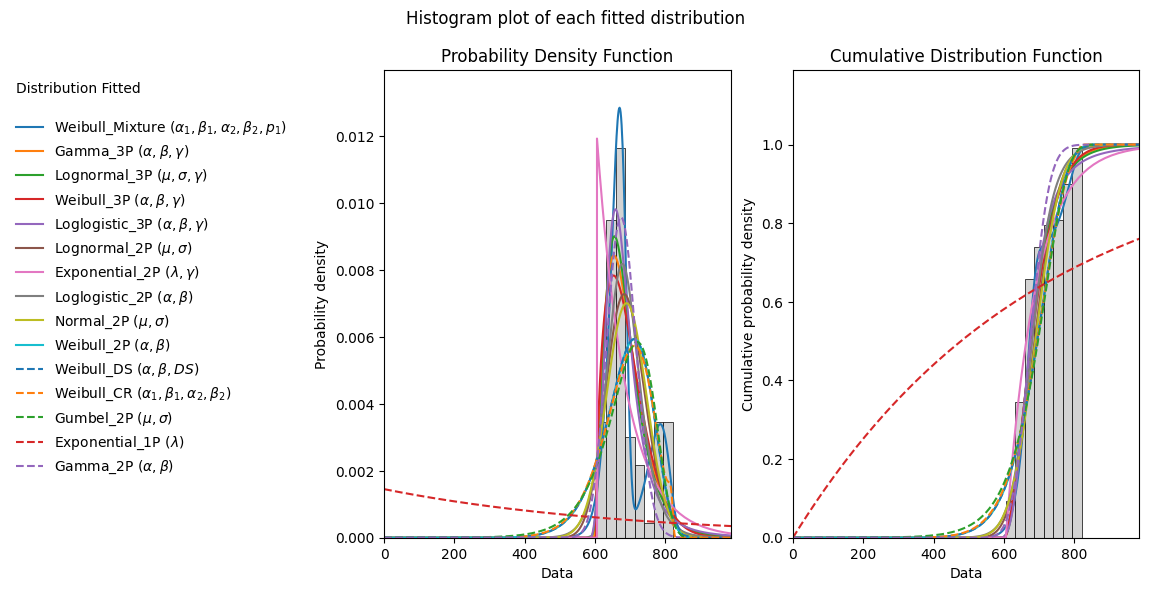

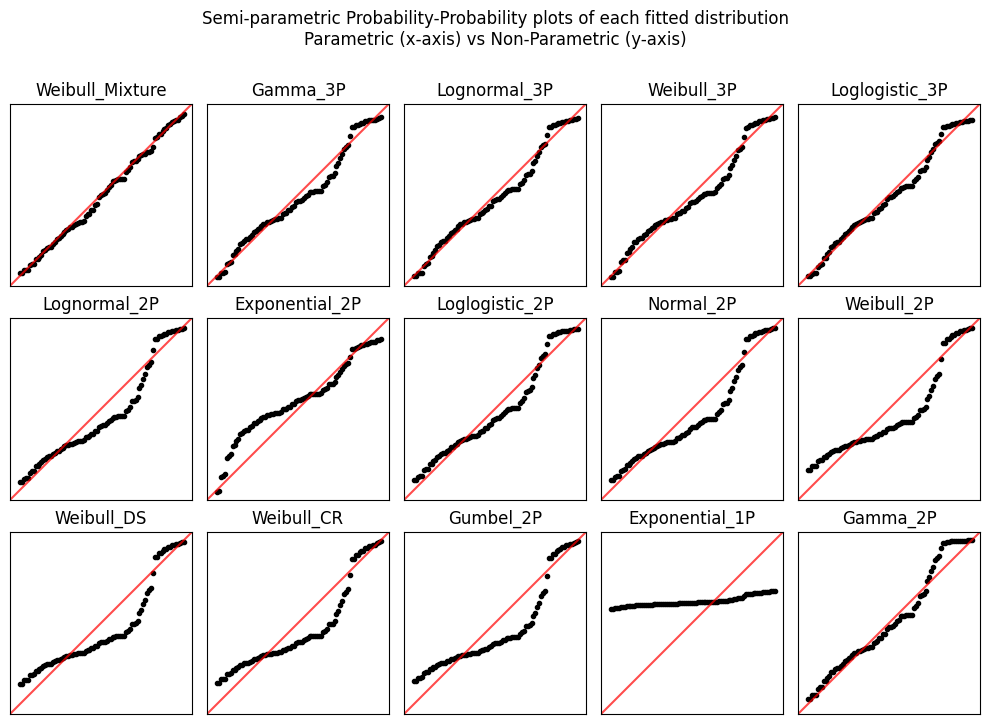

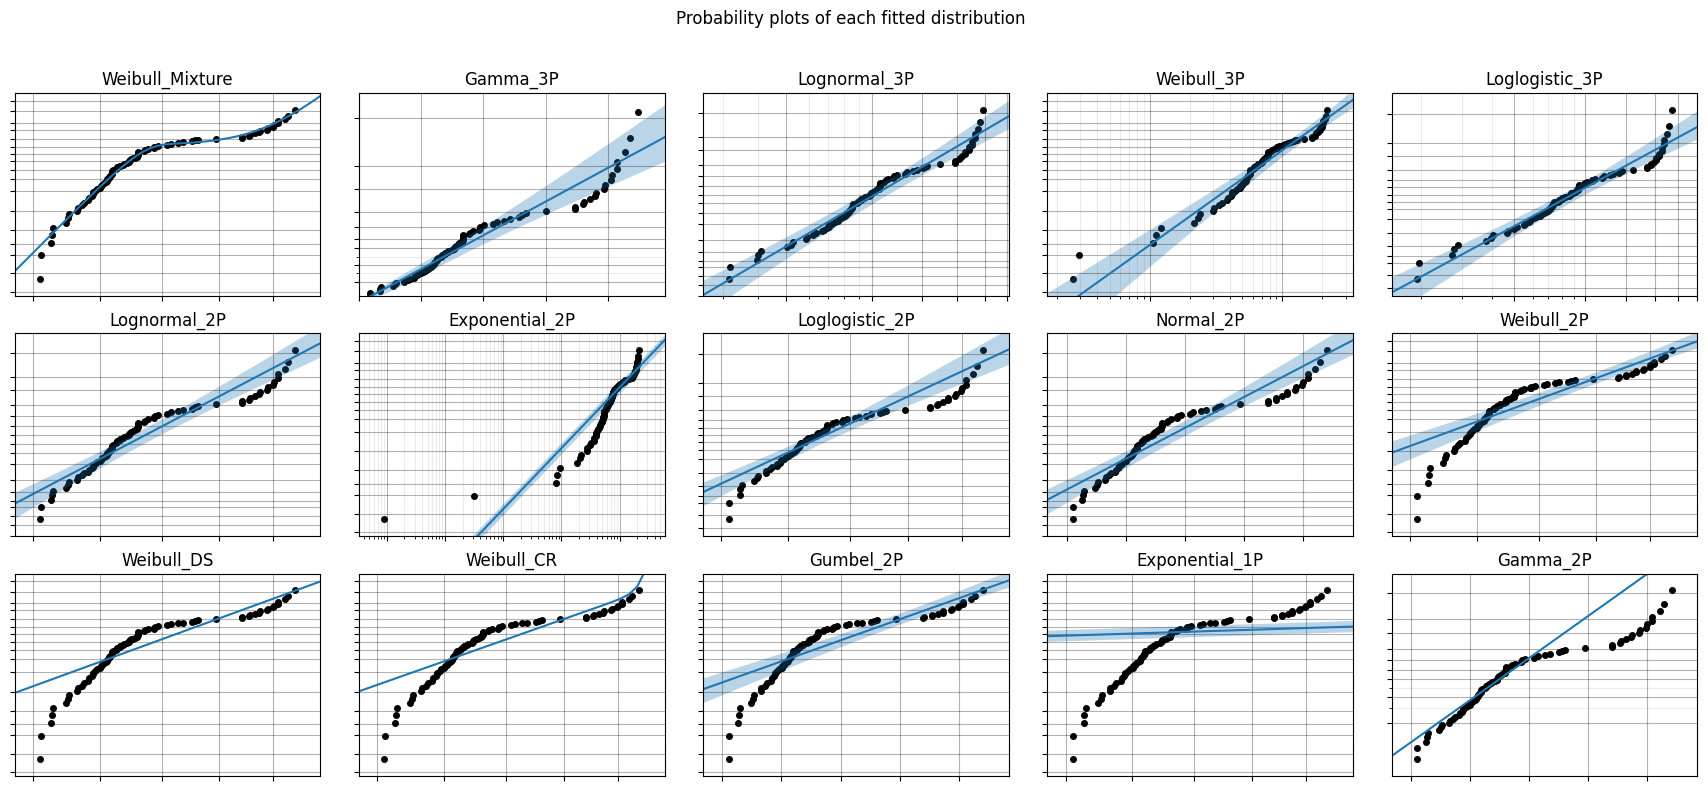

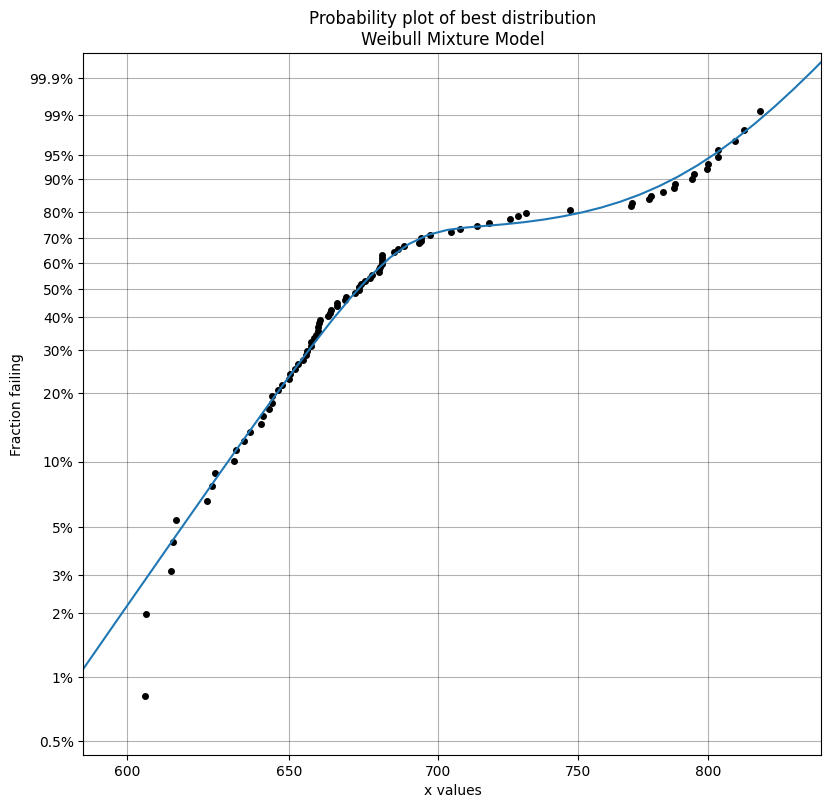

In [7]:
from reliability.Fitters import Fit_Everything
import matplotlib.pyplot as plt

result = Fit_Everything(failures=data)
plt.show()

In [8]:
best_distribution = result.best_distribution
print(best_distribution.mean)
print(best_distribution.SF(50))

689.0563157101276
1.0


In [9]:
C = 100000
EC = C/best_distribution.mean
print('Expected Cost Rate :', EC, 'euros/day')

Expected Cost Rate : 145.126019049607 euros/day


# Task 2: Estimate the expected cost rate if we implement the Siemens model.

In the model you developed for Siemens, when the algorithm predicts a label "1", it actually indicates an inbalanced in the rotation of the bearing. The bearing does not fail yet, but it is an indication that a failure is going to happen soon. It is fair to assume that if we replace the bearing when the model predicts "1", we only need to pay the cost of the bearing itself, not the failure cost $C_1$. However, since your model is not perfect, it might have "false alarm" and "missing alarm". When a false alarm happens, you will replace a healthy bearing with $C_2 = 1000$ euros; while when a missing alarm happens, you will pay cost $C_1$ as your model did not detect the failure. If a failure happens and it is detected by your model, then the cost will be $C_2$ as well. The goal for this task is, then, to estimate the expected cost rate if we implement this "imperfect model", so that we could compare it to the other maintenance strategies.

Hints: 
- You can use the results of your cross validation to estimate the false alarm and missing alarm probability.
- To calculate expected cost rate for a complex system, we could use Monte Carlo simulation to estimate the average cost rate over $t$, and let $t$ increases until this value converges.

In [10]:
import numpy as np
from scipy.stats import binom

def calculate_prob_one_day(p):
    proba_hour = 1 - binom.cdf(56,60,p)
    print(proba_hour)
    proba_day = 1 - (1-proba_hour)**24
    # print(proba_day)
    return proba_day

p = calculate_prob_one_day(0.1)
print(p)
print(1 - (1-p)**10)

0.0
0.0
0.0


In [11]:
import scipy.integrate as integrate
import numpy as np
import scipy.stats as st
import sys
## Parameter definitions
# t
p = calculate_prob_one_day(0.878)
evaluation_horizon = 10000
# Number of sample paths
n_s = 100
# Parameters of age replacement
c_1 = 100000;
c_2 = 1000
# Time to failure distribution
lifetime_dist = best_distribution
## Run simulation
# Define intial values
cost = np.zeros(n_s) # Total cost
n_cm = np.zeros(n_s) # Number of failures (Corrective replacements)
n_pm = np.zeros(n_s) # Number of preventive replacements
# Simulation starts
for i in range(n_s):
# Clear the temparory variables for each cycle.
      t = 0
      temp_cost = 0
      temp_n_cm = 0
      temp_n_pm = 0
      sys.stdout.write("\rpath number : {}".format(i+1))
      sys.stdout.flush()

      # Simulate one sample path.
      while t < evaluation_horizon:
            t_f = lifetime_dist.random_samples(number_of_samples=1) # Generate time to failure 
            T_f = t + t_f
            j = -10
            detection = 0
            while (j<0 and detection==0):
                  detection = np.random.binomial(1,p)
                  if detection == 0 :
                        j+=1
                  else :
                        temp_cost += c_2
                        temp_n_pm += 1
                        t = T_f + j
            if detection == 0 :
                  t = T_f
                  temp_cost += c_1
                  temp_n_cm += 1
      cost[i] = temp_cost
      n_cm[i] = temp_n_cm
      n_pm[i] = temp_n_pm

0.055084458720360496
path number : 100

In [287]:
## Calculate the performance indexes:
# Expected number of failure 
E_n_cm = np.mean(n_cm) # Point estimate
print('E[N_CM(t)]')
print(E_n_cm)
# Confidence interval
print(st.norm.interval(confidence=0.95, loc=E_n_cm, scale=st.sem(n_cm)))

# Expected number of preventive replacements 
E_n_pm = np.mean(n_pm) # Point estimate
print('\nE[N_PM(t)]')
print(E_n_pm)
# Confidence interval
print(st.norm.interval(confidence=0.95, loc=E_n_pm, scale=st.sem(n_pm)))

# Expected number of replacements 
E_n = np.mean(n_cm + n_pm) # Point estimate
print('\nE[N_(t)]')
print(E_n)
# Confidence interval
print(st.norm.interval(confidence=0.95, loc=E_n, scale=st.sem(n_cm+n_pm)))

# Average cost rate
A_cost_rate = np.mean(cost/evaluation_horizon) # Point estimate
print('\nAverage cost rate')
print(A_cost_rate)
# Confidence interval
print(st.norm.interval(confidence=0.95, loc=A_cost_rate, scale=st.sem(cost/evaluation_horizon)))

# R(1000)
R_1000 = np.mean(n_cm == 0) # Being reliable means that n_cm should be always zero.
print('\nR(1000)')
print(R_1000)
# Confidence interval
print(st.norm.interval(confidence=0.95, loc=R_1000, scale=st.sem(n_cm == 0)))

E[N_CM(t)]
0.0
(nan, nan)

E[N_PM(t)]
15.17
(15.086171881454575, 15.253828118545425)

E[N_(t)]
15.17
(15.086171881454575, 15.253828118545425)

Average cost rate
1.517
(1.5086171881454575, 1.5253828118545423)

R(1000)
1.0
(nan, nan)


# WP 4

In [4]:
import scipy.integrate as integrate
import numpy as np
import scipy.stats as st
import sys

T = 526
## Parameter definitions
# t
evaluation_horizon = 10000
# Number of sample paths
n_s = 1000
# Parameters of age replacement
c_1 = 100000
c_2 = 1000; # Preventive maintenance cost
# Time to failure distribution
lifetime_dist = best_distribution
## Run simulation
# Define intial values
cost = np.zeros(n_s) # Total cost
n_cm = np.zeros(n_s) # Number of failures (Corrective replacements)
n_pm = np.zeros(n_s) # Number of preventive replacements
# Simulation starts
for i in range(n_s):
# Clear the temparory variables for each cycle.
      t = 0
      temp_cost = 0
      temp_n_cm = 0
      temp_n_pm = 0
      sys.stdout.write("\rpath number : {}".format(i+1))
      sys.stdout.flush()

      # Simulate one sample path.
      while t < evaluation_horizon:
            t_f = lifetime_dist.random_samples(number_of_samples=1) # Generate time to failure       
            if t_f > T :
                  t+=T
                  temp_cost += c_2
                  temp_n_pm += 1
            else :
                  t+=t_f
                  temp_cost += c_1
                  temp_n_cm += 1
      cost[i] = temp_cost
      n_cm[i] = temp_n_cm
      n_pm[i] = temp_n_pm

NameError: name 'best_distribution' is not defined

In [104]:
## Calculate the performance indexes:
# Expected number of failure 
E_n_cm = np.mean(n_cm) # Point estimate
print('E[N_CM(t)]')
print(E_n_cm)
# Confidence interval
print(st.norm.interval(confidence=0.95, loc=E_n_cm, scale=st.sem(n_cm)))

# Expected number of preventive replacements 
E_n_pm = np.mean(n_pm) # Point estimate
print('\nE[N_PM(t)]')
print(E_n_pm)
# Confidence interval
print(st.norm.interval(confidence=0.95, loc=E_n_pm, scale=st.sem(n_pm)))

# Expected number of replacements 
E_n = np.mean(n_cm + n_pm) # Point estimate
print('\nE[N_(t)]')
print(E_n)
# Confidence interval
print(st.norm.interval(confidence=0.95, loc=E_n, scale=st.sem(n_cm+n_pm)))

# Average cost rate
A_cost_rate = np.mean(cost/evaluation_horizon) # Point estimate
print('\nAverage cost rate')
print(A_cost_rate)
# Confidence interval
print(st.norm.interval(confidence=0.95, loc=A_cost_rate, scale=st.sem(cost/evaluation_horizon)))

# R(1000)
R_1000 = np.mean(n_cm == 0) # Being reliable means that n_cm should be always zero.
print('\nR(1000)')
print(R_1000)
# Confidence interval
print(st.norm.interval(confidence=0.95, loc=R_1000, scale=st.sem(n_cm == 0)))

E[N_CM(t)]
0.01
(-0.009599639845400536, 0.02959963984540054)

E[N_PM(t)]
19.99
(19.9704003601546, 20.009599639845398)

E[N_(t)]
20.0
(nan, nan)

Average cost rate
2.099
(1.9049635655305348, 2.2930364344694656)

R(1000)
0.99
(0.9704003601545994, 1.0095996398454006)


In [106]:
import scipy.integrate as integrate

C_T = (c_1*lifetime_dist.CDF(xvals=T, show_plot=False) +
       c_2*(1 - lifetime_dist.CDF(xvals=T, show_plot=False)))/integrate.quad(
           lambda x: 1-lifetime_dist.CDF(xvals=x, show_plot=False), 0, T)[0]
print('Expected cost rate\n')
print(C_T)

Expected cost rate

1.9643978677105562


In [107]:
import scipy.integrate as integrate
from scipy.optimize import minimize_scalar

# Parameters of age replacement
c_1 = 100000; # Correstive maintenance cost
c_2 = 1000; # Preventive maintenance cost
# Time to failure distribution
lifetime_dist = best_distribution
# Define an anomynous function to calculate the expected cost rate.
EC_T = lambda T: (c_1*lifetime_dist.CDF(xvals=float(T), show_plot=False) + 
                 c_2*(1 - lifetime_dist.CDF(xvals=float(T), show_plot=False)))/integrate.quad(
                     lambda x: 1-lifetime_dist.CDF(xvals=x, show_plot=False), 0, T)[0]
result_a = minimize_scalar(EC_T, method='brent')
print('T*_a = ' + str(result_a.x))
print('Optimal expected cost rate: ' + str(result_a.fun))

T*_a = 525.6345561764955
Optimal expected cost rate: 1.9643831847449507


# Task 2


In [109]:
T = 526
## Parameter definitions
# t
evaluation_horizon = 10000
# Number of sample paths
n_s = 100
# Parameters of age replacement
c_1 = 100000 # Corrective maintenance cost
c_2 = 1000 # Preventive maintenance cost
# Time to failure distribution
lifetime_dist = best_distribution
## Run simulation
# Define intial values
cost = np.zeros(n_s) # Total cost
n_cm = np.zeros(n_s) # Number of failures (Corrective replacements)
n_pm = np.zeros(n_s) # Number of preventive replacements
# Simulation starts
for i in range(n_s):
# Clear the temparory variables for each cycle.
    t = 0
    temp_cost = 0
    temp_n_cm = 0
    temp_n_pm = 0
    sys.stdout.write("\rpath number : {}".format(i+1))
    sys.stdout.flush()

    # Simulate one sample path.
    while t < evaluation_horizon:   
        idx_next_PM = int(t//T)
        t_f = lifetime_dist.random_samples(number_of_samples=1) # Generate time to failure
        t = t + t_f # Time to failure
        if t > T*(idx_next_PM+1) :
            t = T*(idx_next_PM+1)
            temp_cost += c_2
            temp_n_pm += 1
        else :
            temp_cost += c_1
            temp_n_cm += 1
    cost[i] = temp_cost
    n_cm[i] = temp_n_cm
    n_pm[i] = temp_n_pm

path number : 100

In [110]:
## Calculate the performance indexes:
# Expected number of failure 
E_n_cm = np.mean(n_cm) # Point estimate
print('E[N_CM(t)]')
print(E_n_cm)
# Confidence interval
print(st.norm.interval(confidence=0.95, loc=E_n_cm, scale=st.sem(n_cm)))

# Expected number of preventive replacements 
E_n_pm = np.mean(n_pm) # Point estimate
print('\nE[N_PM(t)]')
print(E_n_pm)
# Confidence interval
print(st.norm.interval(confidence=0.95, loc=E_n_pm, scale=st.sem(n_pm)))

# Expected number of replacements 
E_n = np.mean(n_cm + n_pm) # Point estimate
print('\nE[N_(t)]')
print(E_n)
# Confidence interval
print(st.norm.interval(confidence=0.95, loc=E_n, scale=st.sem(n_cm+n_pm)))

# Average cost rate
A_cost_rate = np.mean(cost/evaluation_horizon) # Point estimate
print('\nAverage cost rate')
print(A_cost_rate)
# Confidence interval
print(st.norm.interval(confidence=0.95, loc=A_cost_rate, scale=st.sem(cost/evaluation_horizon)))

# R(1000)
R_1000 = np.mean(n_cm == 0) # Being reliable means that n_cm should be always zero.
print('\nR(1000)')
print(R_1000)
# Confidence interval
print(st.norm.interval(confidence=0.95, loc=R_1000, scale=st.sem(n_cm == 0)))

E[N_CM(t)]
0.0
(nan, nan)

E[N_PM(t)]
20.0
(nan, nan)

E[N_(t)]
20.0
(nan, nan)

Average cost rate
2.0
(nan, nan)

R(1000)
1.0
(nan, nan)


In [112]:
from scipy import signal
import numpy as np

p_th = 1e-4 # Truncation threshold 
n_max = 10 # Maximum number of terms allowed to calculate the convolution.
# Create a grid in (0, T), used for numerically evaluate the convolution.
delta = 1e-4 # Step size.
xx = np.arange(0, T, delta) # Grid.

# The first term: F_1(t) = F(t)
f_nm1 = lifetime_dist.PDF(xvals=xx, show_plot=False)*delta
M_T = lifetime_dist.CDF(xvals=T, show_plot=False)
print('iter' + str(1))
print('F_n_T = ' + str(M_T))

# Recursively calculate F_2(t), F_3(t), ...
for i in range(2, n_max):
    print('iter' + str(i))
    # Numerical convolution.
    f_n = signal.fftconvolve(f_nm1, lifetime_dist.PDF(xvals=xx, show_plot=False)*delta)
    # Only keep the pdf up to T.
    f_n = f_n[:len(f_nm1)]
    # Calculate F_n(t)
    F_n_T = sum(f_n)
    print('F_n_T = ' + str(F_n_T))
    # Determine if we can truncate:
    if F_n_T > p_th:
        M_T += F_n_T # Update M_T
        f_nm1 = f_n # Prepare for teh next iteration.
    else:
        break
# Output M_T
print('M_T = ' + str(M_T))

# Calculate EC
EC = (c_1*M_T + c_2)/T
print('\n EC = ' + str(EC))

iter1
F_n_T = 0.00033598650237125677
iter2
F_n_T = -1.540130929897153e-23
M_T = 0.00033598650237125677

 EC = 1.9650164453177295


In [114]:
from scipy import signal
import numpy as np
from scipy.optimize import minimize_scalar


# This subfunction calculate the expected cost rate for block replacement, given values of T.
def cal_ec_block(T, lifetime_dist, c_1, c_2): 
    p_th = 1e-4 # Truncation threshold 
    n_max = 20 # Maximum number of terms allowed to calculate the convolution.
    # Create a grid in (0, T), used for numerically evaluate the convolution.
    delta = 1e-4 # Step size.
    xx = np.arange(0, T, delta) # Grid.

    # The first term: F_1(t) = F(t)
    f_nm1 = lifetime_dist.PDF(xvals=xx, show_plot=False)*delta
    M_T = lifetime_dist.CDF(xvals=float(T), show_plot=False)

    # Recursively calculate F_2(t), F_3(t), ...
    for i in range(2, n_max):
        # Numerical convolution.
        f_n = signal.fftconvolve(f_nm1, lifetime_dist.PDF(xvals=xx, show_plot=False)*delta)
        # Only keep the pdf up to T.
        f_n = f_n[:len(f_nm1)]
        # Calculate F_n(t)
        F_n_T = sum(f_n)
        # Determine if we can truncate:
        if F_n_T > p_th:
            M_T += F_n_T # Update M_T
            f_nm1 = f_n # Prepare for teh next iteration.
        else:
            break

    # Calculate EC
    EC = (c_1*M_T + c_2)/T

    return EC


# Parameters of age replacement
c_1 = 100000; # Correstive maintenance cost
c_2 = 1000; # Preventive maintenance cost
# Time to failure distribution
lifetime_dist = best_distribution
# Run the optimization
result_b = minimize_scalar(cal_ec_block, args=(lifetime_dist, c_1, c_2), bounds=(500, 600), method='bounded')
print('T*_b = ' + str(result_b.x))
print('Optimal expected cost rate: ' + str(result_b.fun))

T*_b = 525.4735689739124
Optimal expected cost rate: 1.964985865304472
